In [3]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
start = '2016-01-01'
end = '2017-01-01'

In [5]:
asset = get_pricing('AAPL', fields='price', start_date=start, end_date=end)

In [12]:
benchmark = get_pricing('SPY',fields='price', start_date=start, end_date=end)

In [16]:
asset_ret = asset.pct_change(1)[1:]#to grab everything beyond first row which is NaN
bench_ret = benchmark.pct_change(1)[1:] #to grab everything beyond first row which is NaN

PLOT

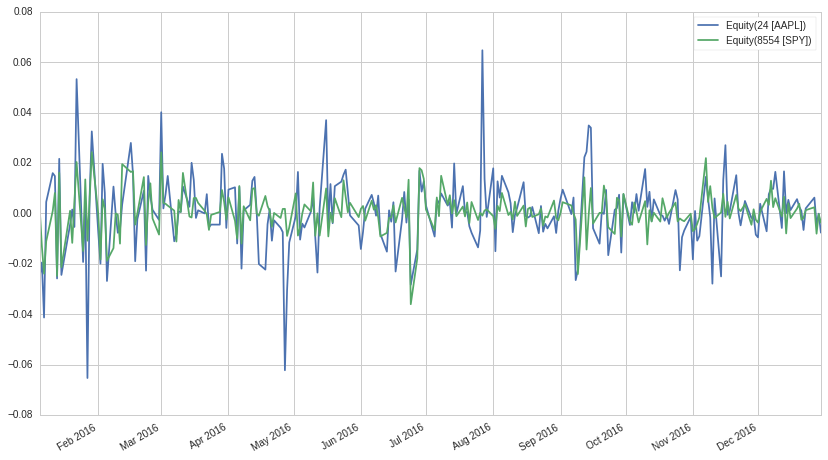

In [17]:
asset_ret.plot()
bench_ret.plot()
plt.legend()

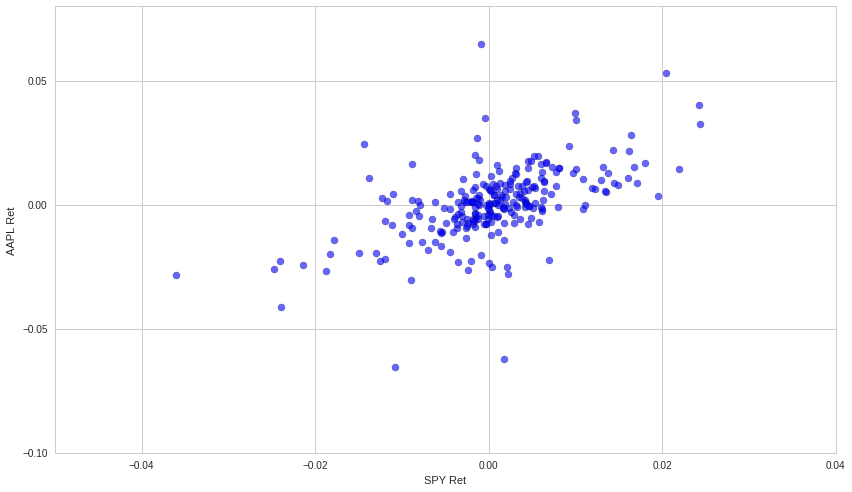

In [18]:
plt.scatter(bench_ret, asset_ret,alpha=0.6,s=50)
plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')

In [19]:
AAPL = asset_ret.values #Just retruns the numbers and leaves out the dates
SPY = bench_ret.values

In [20]:
spy_const = sm.add_constant(SPY) #to get interecept

In [21]:
model = regression.linear_model.OLS(AAPL,spy_const).fit()

In [23]:
model.params #essentially y = mx + b

array([  1.67990248e-05,   1.02981370e+00])

In [24]:
alpha, beta = model.params

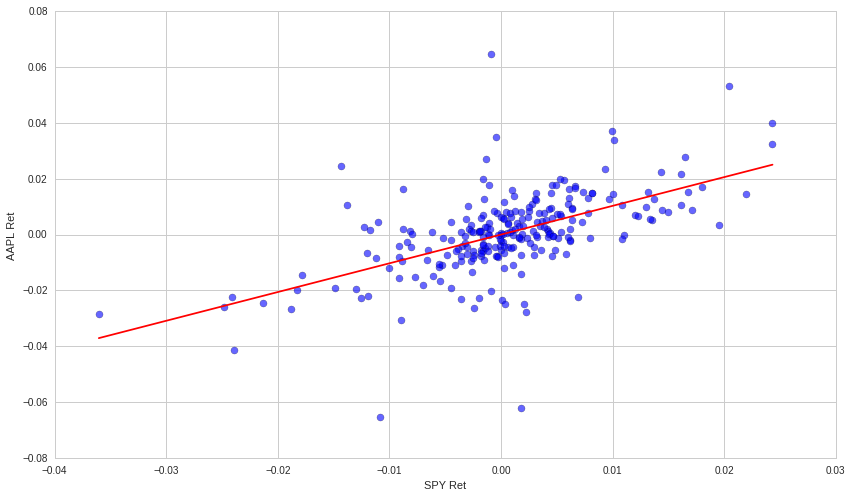

In [25]:
min_spy = bench_ret.values.min()
max_spy = bench_ret.values.max()

spy_line = np.linspace(min_spy,max_spy,100)
y = spy_line*beta + alpha

plt.plot(spy_line, y, c='r')
plt.scatter(bench_ret, asset_ret,alpha=0.6,s=50)
plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')

In [26]:
hedged = -1*(beta * bench_ret) + asset_ret

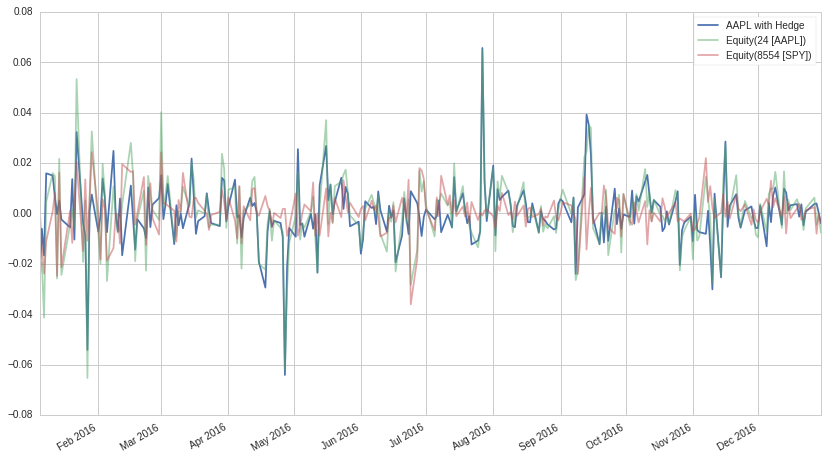

In [27]:
hedged.plot(label = 'AAPL with Hedge')
asset_ret.plot(alpha=0.5)
bench_ret.plot(alpha=0.5)
plt.legend()

#alot of noise, need to zoom in a period for better view

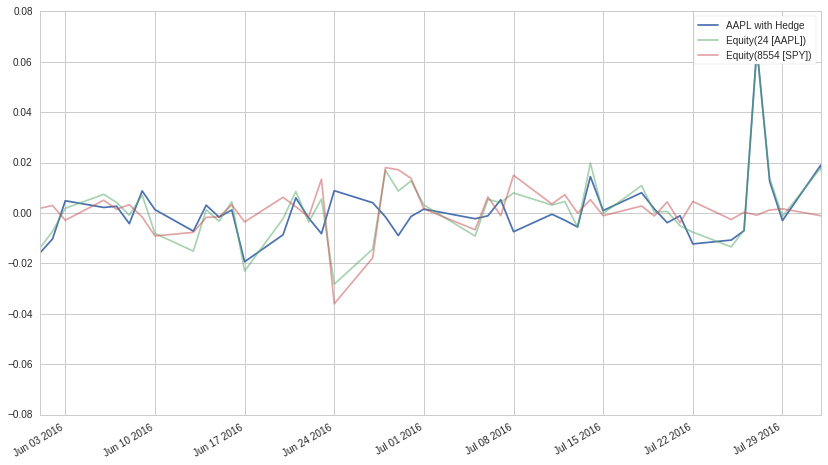

In [28]:
hedged.plot(label = 'AAPL with Hedge')
asset_ret.plot(alpha=0.5)
bench_ret.plot(alpha=0.5)

plt.xlim(['2016-06-01','2016-08-01'])

plt.legend()
#Hedged against market behavior

In [29]:
def alpha_beta(benchmark_ret, stock):
    benchmark = sm.add_constant(benchmark_ret)
    
    model = regression.linear_model.OLS(stock, benchmark).fit()
    
    return model.params[0],model.params[1]

In [32]:
##
## 2016 CELL
##
start = '2016-01-01'
end = '2017-01-01'
asset2016 = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark2016 = get_pricing('SPY',fields='price', start_date=start, end_date=end)

asset_ret2016 = asset2016.pct_change(1)[1:]
benchmark_ret2016 = benchmark2016.pct_change(1)[1:]

aret_values = asset_ret2016.values
bret_values = benchmark_ret2016.values

alpha2016, beta2016 = alpha_beta(bret_values, aret_values)

print('2016 Values')
print('alpha ' + str(alpha2016))
print('beta ' + str(beta2016))

2016 Values
alpha 1.679902481e-05
beta 1.02981369795


In [33]:
portfolio =  -1*(beta2016 * benchmark_ret2016) + asset_ret2016

In [34]:
alpha,beta = alpha_beta(benchmark_ret2016,portfolio)

In [35]:
print('PORTFOLIO ALPHA AND BETA')
print('alpha ' + str(alpha))
print('beta ' + str(beta))

PORTFOLIO ALPHA AND BETA
alpha 1.679902481e-05
beta 1.36609473733e-16


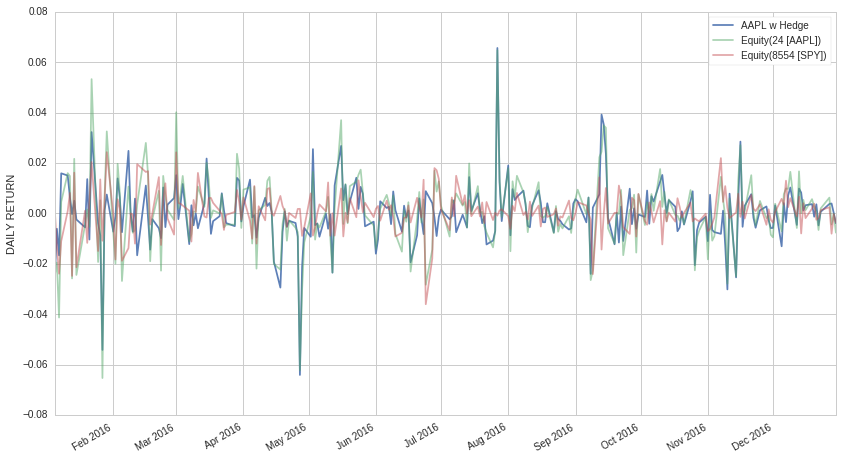

In [36]:
portfolio.plot(alpha = 0.9,label='AAPL w Hedge')
asset_ret2016.plot(alpha=0.5)
benchmark_ret2016.plot(alpha=0.5)
plt.ylabel('DAILY RETURN')
plt.legend()

In [37]:
portfolio.mean()

1.6799024809993652e-05

In [38]:
asset_ret2016.mean()

0.000574549568770769

In [39]:
portfolio.std()

0.012065447808277703

In [40]:
asset_ret2016.std()

0.014702747344261722